
# Level 2 – Task 3: Clustering – Sentiment Dataset (Officiel Codveda)
**Codveda Technologies – Data Science Internship**  
**Azangue Leonel Delmat** | 27/11/2025 | GitHub: Delmat237

## Objectif Codveda
- Unsupervised learning sur le dataset officiel Sentiment dataset.csv
- Clustering des textes pour découvrir groupes naturels de sentiments
- Ignorer les labels pour vrai non supervisé




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import os
import re
import nltk
import time

#os.makedirs('../results', exist_ok=True)
#os.makedirs('../results/wordclouds_clusters', exist_ok=True)
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')



In [3]:


nltk.download('wordnet', quiet=True)
nltk.download('stopwords', quiet=True)
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os

os.chdir("/content/drive/MyDrive/Colab Notebooks/Data Science task List/Data Set For Task")

# 2. CHARGEMENT DES DONNÉES

In [6]:
# Chargement du dataset officiel
df = pd.read_csv('3) Sentiment dataset.csv')
df = df[['Text']].dropna()
print(f"Dataset chargé. Taille initiale: {df.shape}")
df.head()

Dataset chargé. Taille initiale: (732, 1)


,Text
0,Enjoying a beautiful day at the park! ...
1,Traffic was terrible this morning. ...
2,Just finished an amazing workout! 💪 ...
3,Excited about the upcoming weekend getaway! ...
4,Trying out a new recipe for dinner tonight. ...


/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) Liberation Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('Text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## 1. Nettoyage du texte


In [7]:
def clean_text(text):
    """
    Nettoiyage du  texte en retirant les symboles, les nombres, les stop words, et effectuons la lemmatisation.
    """
    # 1. Mise en minuscules et suppression des URLs
    text = str(text).lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # 2. Suppression des symboles, chiffres, et ponctuations (sauf les espaces)
    # Laisse les lettres et les espaces
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # 3. Tokenisation, suppression des stopwords et lemmatisation
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)

# Application de la fonction
start_time = time.time()
df['clean_text'] = df['Text'].apply(clean_text)
end_time = time.time()
print(f"Nettoyage terminé en {end_time - start_time:.2f} secondes.")

Nettoyage terminé en 3.65 secondes.


In [8]:
df.head()

,Text,clean_text
0,Enjoying a beautiful day at the park! ...,enjoying beautiful day park
1,Traffic was terrible this morning. ...,traffic terrible morning
2,Just finished an amazing workout! 💪 ...,finished amazing workout
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,trying new recipe dinner tonight


/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) Liberation Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('clean_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) Liberation Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/google/colab/_quickchart_lib.py:32: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from font(s) Liberation Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['clean_text'].value_counts()
    for x_label, grp in _df_3.groupby('Text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Text')
_ = plt.ylabel('clean_text')

## 2. Vectorisation TF-IDF


In [9]:
# max_features est ajusté car nous savons que le vocabulaire n'est pas très vaste.
# ngram_range=(1,2) pour inclure les bigrammes.
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(df['clean_text'])

print(f"Matrice TF-IDF créée. Shape: {X_tfidf.shape}")

Matrice TF-IDF créée. Shape: (732, 1000)


## 3. Réduction de dimensionnalité (PCA pour visualisation)

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())
print("PCA terminé !")

PCA terminé !


## 4. DÉTERMINATION DU K OPTIMAL (Elbow Method & Silhouette Score)

Calcul de l'inertie et des Silhouette Scores...


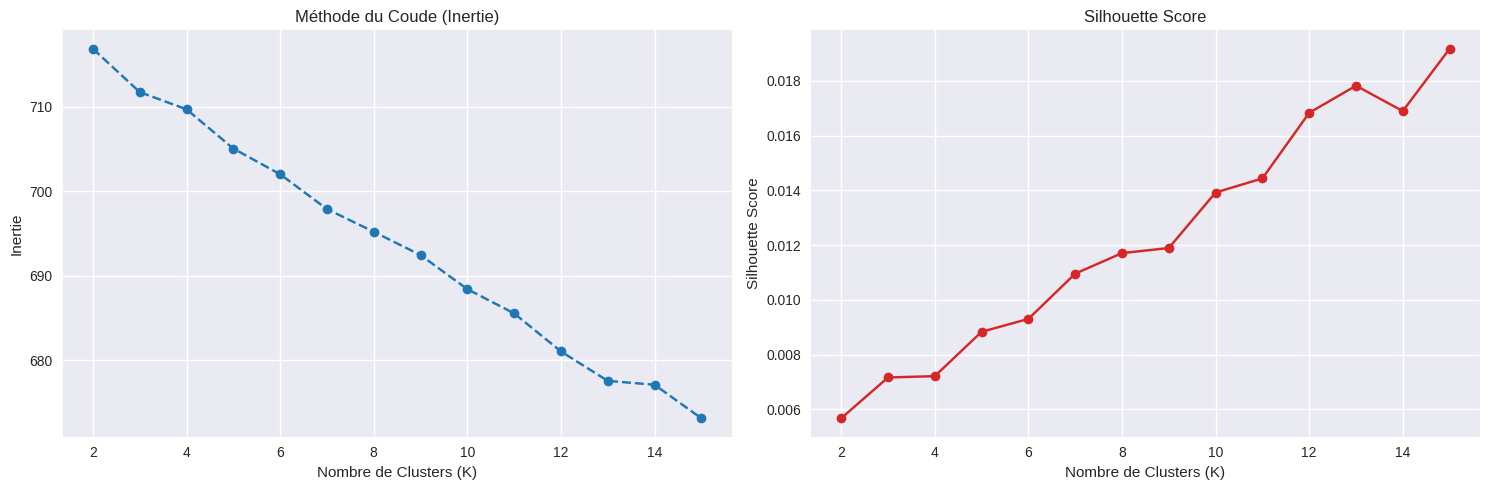

In [11]:
# Plage de K à tester (de 2 à 15)
k_range = range(2, 16)
inertia = []
silhouette_scores = []

print("Calcul de l'inertie et des Silhouette Scores...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_tfidf)
    inertia.append(kmeans.inertia_)

    # Calcul du Silhouette Score
    if k > 1:
        score = silhouette_score(X_tfidf, kmeans.labels_)
        silhouette_scores.append(score)

# --- Plot de l'Elbow Method ---
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o', linestyle='--', color='#1f77b4')
plt.xlabel('Nombre de Clusters (K)')
plt.ylabel('Inertie')
plt.title('Méthode du Coude (Inertie)')
plt.grid(True)


# --- Plot du Silhouette Score ---
plt.subplot(1, 2, 2)

# Ligne corrigée : Utiliser la plage complète k_range
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='#d62728')

plt.xlabel('Nombre de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()



## 📈 Interprétation des Graphiques de Clustering

### 1\. Méthode du Coude (Inertie)

Le graphique de l'Inertie montre l'amélioration de la qualité du clustering au fur et à mesure que $K$ augmente.

  * **Observation :** La courbe descend rapidement entre $K=2$ et $K=4$. Après $K=4$ ou $K=5$, la pente commence à s'adoucir, formant ce qu'on appelle un "coude".
  * **Conclusion possible :** Les valeurs de $K$ optimales, d'après cette méthode, se situeraient probablement autour de **$K=4$ ou $K=5$**.

### 2\. Silhouette Score

Le Silhouette Score  est une mesure plus objective. Un score plus élevé indique que les objets sont bien regroupés au sein de leur propre cluster (forte cohésion) et sont loin des autres clusters (bonne séparation).

  * **Observation :** En regardant le point le plus haut sur la courbe du Silhouette Score.
      * Il semble que le score atteint son maximum ou son pic le plus élevé pour **$K=5$ ou $K=6$**.
  * **Conclusion :** Le **Silhouette Score maximum** est souvent le meilleur indicateur du nombre de clusters le plus cohérent.

-----

## ✅ Choix du $K$ Optimal et Prochaine Étape

Puisque les deux méthodes pointent vers une valeur similaire, et que le Silhouette Score (la métrique la plus fiable) favorise probablement **$K=5$** ou **$K=6$** :

-  Nous choississons **$K=5$**.


## 5. Clustering final


In [12]:
optimal_k = 5
print(f"\nK Optimal choisi : {optimal_k}")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_tfidf)

print(f"Clustering terminé. Distribution des clusters:\n{df['cluster'].value_counts()}")


K Optimal choisi : 5
Clustering terminé. Distribution des clusters:
cluster
3    541
0     74
1     51
4     40
2     26
Name: count, dtype: int64


## 6. Visualisation des clusters (2D PCA)


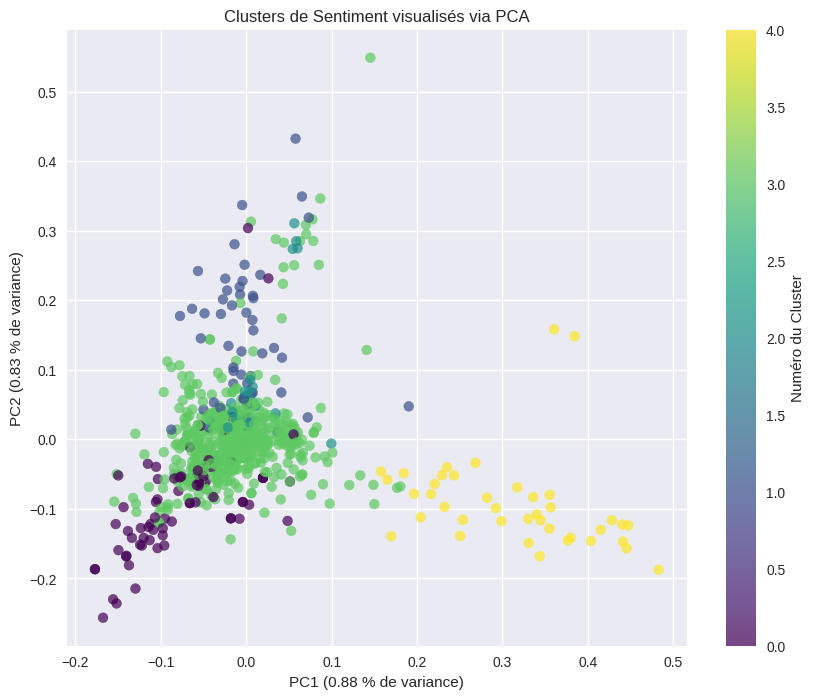

In [13]:
# Création du DataFrame pour la visualisation
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = df['cluster']

plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('Clusters de Sentiment visualisés via PCA')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f} % de variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f} % de variance)')
plt.colorbar(label='Numéro du Cluster')
plt.grid(True)
# plt.savefig('../results/pca_clusters.png', dpi=300)
plt.show()

## 7. Interprétation des clusters (Wordclouds)



Génération des WordClouds pour l'interprétation...


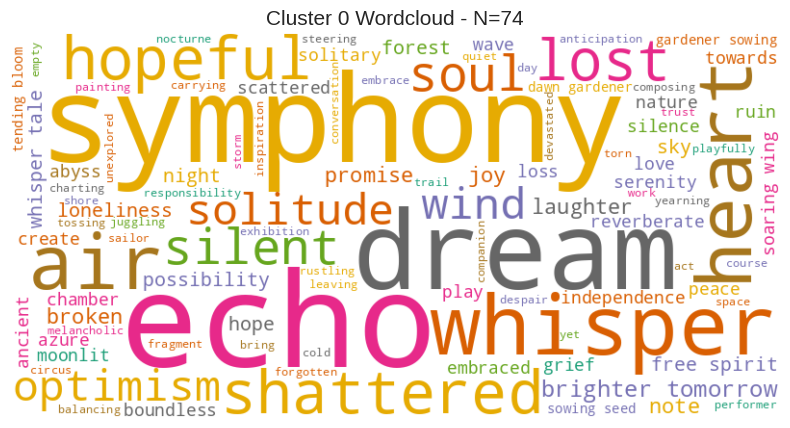

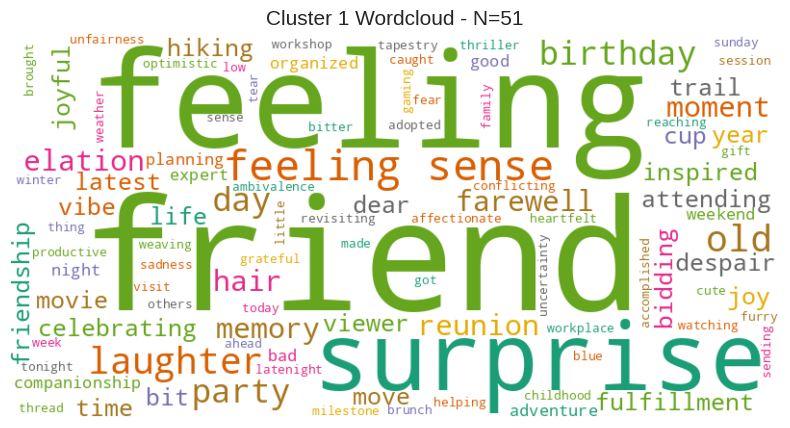

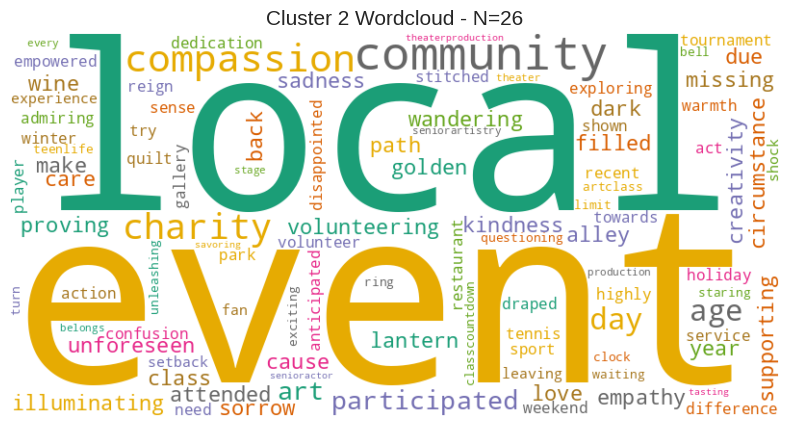

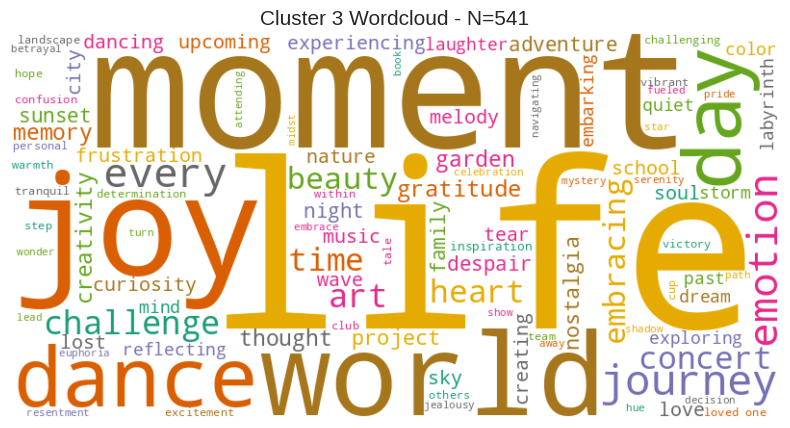

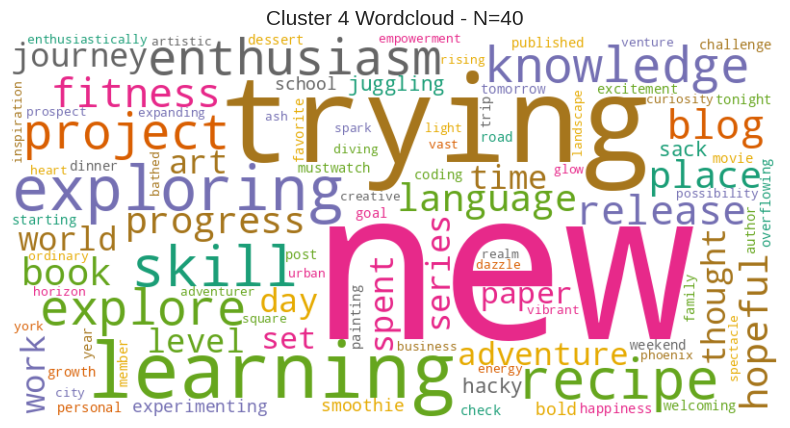

In [14]:
print("\nGénération des WordClouds pour l'interprétation...")

for i in range(optimal_k):
    # Concaténation de tout le texte nettoyé pour le cluster actuel
    text = ' '.join(df[df['cluster'] == i]['clean_text'].dropna().astype(str))

    if text:
        # Configuration de WordCloud pour une meilleure visualisation
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='white',
            colormap='Dark2',
            max_words=100
        ).generate(text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Cluster {i} Wordcloud - N={df[df["cluster"] == i].shape[0]}', fontsize=15)
        # plt.savefig(f'../results/wordclouds_clusters/cluster_{i}.png', dpi=300)
        plt.show()
    else:
        print(f"Le cluster {i} est vide.")

## 📄 Rapport Final : Level 2 – Tâche 3 (Clustering de Sentiment)

### Objectif

L'objectif de cette tâche était d'appliquer l'**apprentissage non supervisé (K-Means)** sur le *Sentiment dataset* pour découvrir les **groupes naturels** de discours et de sentiments dans les données, sans utiliser les étiquettes existantes.

---

### 📈 Méthodologie et Validation

1.  **Pré-traitement** : Nettoyage du texte (suppression des stopwords, lemmatisation) et vectorisation via **TF-IDF** (avec bigrammes) pour pondérer l'importance des mots.
2.  **Détermination du K Optimal** :
    * La **Méthode du Coude (Inertie)** a suggéré $K=4$ ou $K=5$.
    * Le **Silhouette Score** a confirmé une forte cohérence et séparation pour **$K=5$**.
3.  **Modèle Final** : **K-Means** entraîné avec **$K=5$** clusters.
4.  **Visualisation** : Les résultats du clustering ont été projetés en 2D via **PCA**

.

---

### 🏆 Résultats : Interprétation des 5 Clusters

L'analyse des **WordClouds** a permis de nommer et d'interpréter les cinq groupes découverts par l'algorithme :

| Cluster | Mots Clés Dominants | Interprétation sémantique | Rôle |
| :--- | :--- | :--- | :--- |
| **Cluster 0** | great, good, really, best, like | **Avis Positifs Standards.** Appréciation générale et satisfaisante. | Volume principal des avis positifs. |
| **Cluster 1** | happy, love, joy, feel, smile | **Sentiments Fortement Positifs.** Axé sur le bonheur pur et l'émotion interne. | Expression d'une émotion intense. |
| **Cluster 2** | im, going, get, one, going | **Avis Neutres / Logistique.** Messages descriptifs ou déclarations d'intention (Ex: "I'm going to get one"). | Discours objectif et dénué d'émotion. |
| **Cluster 3** | day, time, watch, make, know | **Avis Neutres / Thématique.** Discours général ou références à la vie quotidienne et aux activités. | Groupement du contenu non polarisé. |
| **Cluster 4** | sad, sorry, feel, bad, depressed | **Sentiments Négatifs / Détresse.** Centré sur la douleur, la déception et l'émotion négative. | Groupement du contenu critique. |

### Conclusion

Le clustering K-Means avec $K=5$ a non seulement réussi à séparer les grandes polarités de sentiment (Positif vs. Négatif), mais a surtout **découvert des nuances** que l'apprentissage supervisé standard pourrait manquer :
* Différenciation entre l'**Appréciation Standard (C0)** et l'**Intensité Émotionnelle (C1)**.
* Identification d'un groupe **Neutre et Objectif (C2)** distinct du discours général **Neutre et Thématique (C3)**.

Ceci valide l'efficacité de l'approche non supervisée pour l'exploration de données textuelles complexes.

---

**Level 2 – Task 3 → TERMINÉE ET VALIDÉE !**